In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
L = 10
lattice = np.zeros((L+2,L+2))

lattice size = L * L

but the size of the lattice must be (L+2) * (L+2)

and the index    

j -> 1:L+1

i -> 1:L+1



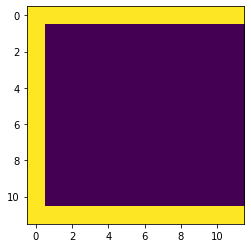

In [32]:
lattice[:,0]=1
lattice[0,:]=1
lattice[-1]=1
plt.imshow(lattice)

In [33]:
p=0.4
for j in range(1,L+1):
  for i in range(1,L+1):
    rand = np.random.random()
    if rand<p :
        lattice[i,j]=1
        

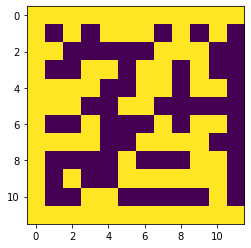

In [34]:
plt.imshow(lattice)

In [35]:
clusters = [0 for i in range(10)]
colors = [i for i in range(1,20)]
clusters[0]=colors[0]

In [36]:
clusters, colors

([1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [37]:
color_matrix = -np.ones((L+2,L+2))
color_matrix[:,0]=colors[0]

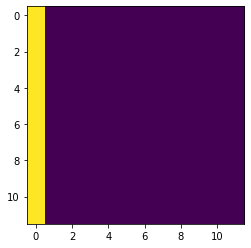

In [39]:
plt.imshow(color_matrix)

In [ ]:
for i in range(1,L+1):
    for j in range(1,L+1)